2023-12-01 18:21:32.027858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Functions Defined.
############################################################################

 #####################    FUSIONTYPE:  /home/hanneswarnhofer/.local/share/jupyter/runtime/kernel-v2-5458HZUpipnSKWm.json    #######################



 Epochs:  50

 Batch Size:  32

 Regularization:  1e-05

 Events:  100000

 Learning Rate:  0.001

 Transfer:  no

 Threshold:  60

 Nonzero Cut:  2

 Plotting Events:  no


Date-Time:  2023-12-01_18-21
Successfully opened gamma data!
Successfully opened proton data!
The label array only consists of zeros and ones.
Shape of Tel1:  (8000,)
Shape of Tel2:  (8000,)
Shape of Tel3:  (8000,)
Shape of Tel4:  (8000,)
Shape of Labels:  (8000,)
Labels:  [1 1 1 ... 0 0 0]
/home/hanneswarnhofer/ECAP_HiWi_WorkingDirectory
[ 263 3042 6137 3149 6510  280 2817 4209 1671 3501]
Start Mapping...
... Finished Mapping
Mapped Label Selection:  [0 0 0 0 1 1 0 1 0 0]
Shape of mapped_images_1:  (2000, 41, 41, 1)
Shape of mapped_images:  (4, 2000, 41, 41, 1)
The mappe

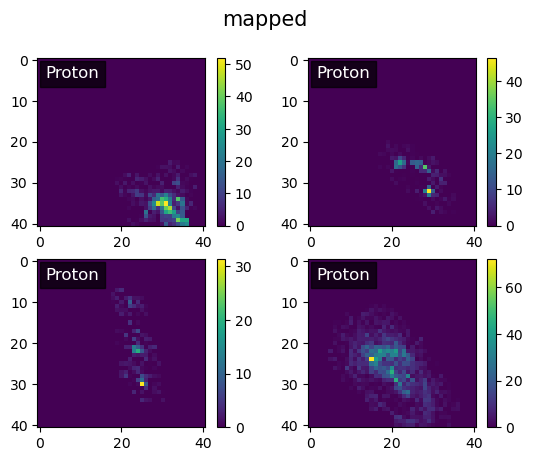

Min. and Max. Value for Image 1:  0.0  -  51.96366 . Sum:  1460.2583
Min. and Max. Value for Image 2:  0.0  -  46.427647 . Sum:  488.55722
Min. and Max. Value for Image 3:  0.0  -  31.275097 . Sum:  347.12173
Min. and Max. Value for Image 4:  0.0  -  72.10256 . Sum:  3722.283
Mapped Images Event  1434 : Image plotted!
Plotting Example Event. Event Nr:  1434


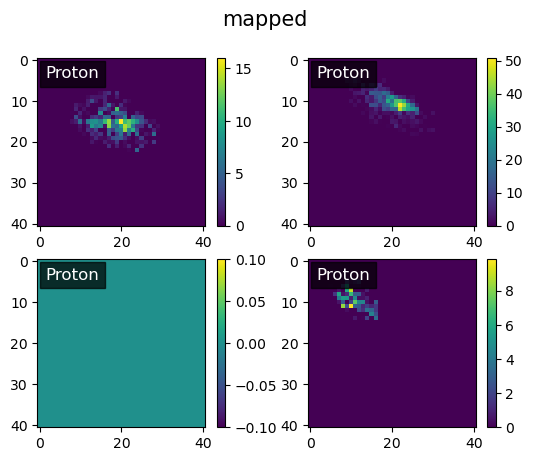

Min. and Max. Value for Image 1:  0.0  -  16.02748 . Sum:  530.38165
Min. and Max. Value for Image 2:  0.0  -  50.864098 . Sum:  1127.6577
Min. and Max. Value for Image 3:  0.0  -  0.0 . Sum:  0.0
Min. and Max. Value for Image 4:  0.0  -  9.836752 . Sum:  154.24892
2000  events with 4 images each are available 

Shape of 'mapped_labels':  (2000, 1)
Shape of 'mapped_images':  (2000, 4, 41, 41, 1) 

[ True  True  True  True  True  True  True  True  True  True]
Split into Training and Test Data
Train data shape: (1603, 4, 41, 41, 1) --> 80.15 %
Test data shape: (397, 4, 41, 41, 1) --> 19.85 %
Train labels shape: (1603, 1)
Test labels shape: (397, 1)
Total NaN entries: 0
Percentage of NaN entries: 0.000000%
Total NaN entries: 0
Percentage of NaN entries: 0.000000%
Train data shape: (1603, 4, 41, 41, 1) --> 80.15 %
Test data shape: (397, 4, 41, 41, 1) --> 19.85 %
Train labels shape: (1603, 1)
Test labels shape: (397, 1)
(5059, 41, 41, 1)
(5059, 1)
Test Set:
Event Composition:
188 'proton' e

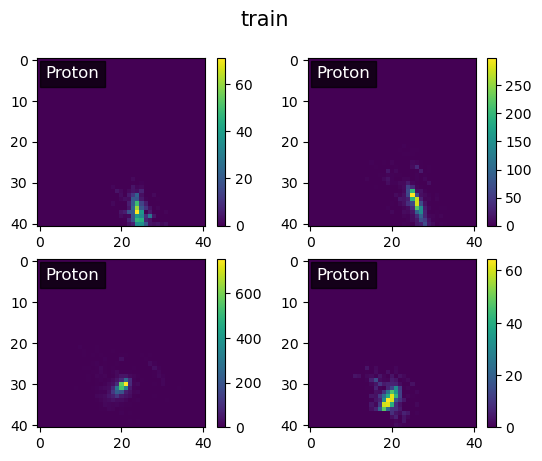

Min. and Max. Value for Image 1:  0.0  -  71.03347 . Sum:  888.84674
Min. and Max. Value for Image 2:  0.0  -  299.21063 . Sum:  3532.5461
Min. and Max. Value for Image 3:  0.0  -  752.0692 . Sum:  5574.418
Min. and Max. Value for Image 4:  0.0  -  64.25514 . Sum:  1070.9128
Train Data Event  1581 : Image plotted!
Plotting Example Event. Event Nr:  1581


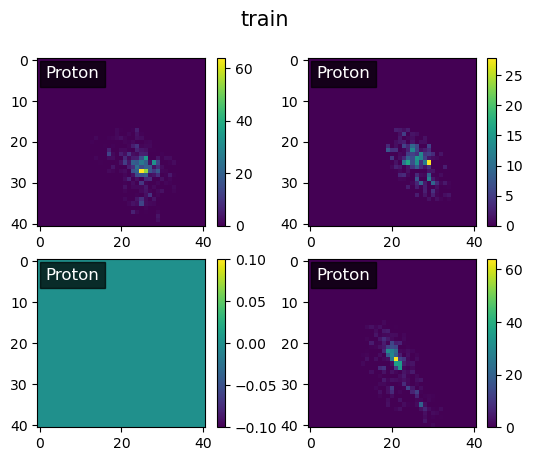

Min. and Max. Value for Image 1:  0.0  -  63.95081 . Sum:  894.8209
Min. and Max. Value for Image 2:  0.0  -  27.94395 . Sum:  442.82425
Min. and Max. Value for Image 3:  0.0  -  0.0 . Sum:  0.0
Min. and Max. Value for Image 4:  0.0  -  63.70017 . Sum:  805.8069
Test Data Event  201 : Image plotted!
Plotting Example Event. Event Nr:  201


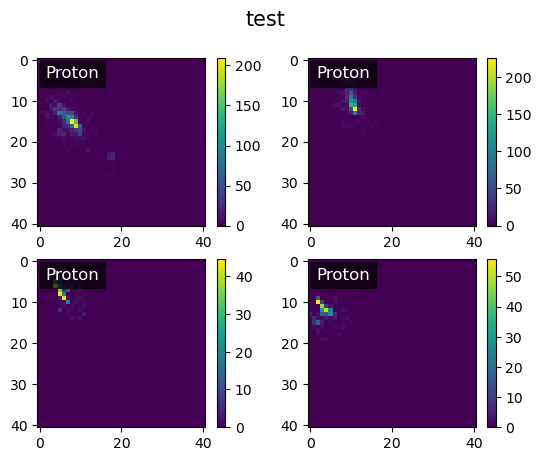

Min. and Max. Value for Image 1:  0.0  -  209.67636 . Sum:  2292.5361
Min. and Max. Value for Image 2:  0.0  -  225.87932 . Sum:  1614.9125
Min. and Max. Value for Image 3:  0.0  -  44.453796 . Sum:  332.68143
Min. and Max. Value for Image 4:  0.0  -  55.702415 . Sum:  398.7082
Test Data Event  202 : Image plotted!
Plotting Example Event. Event Nr:  202


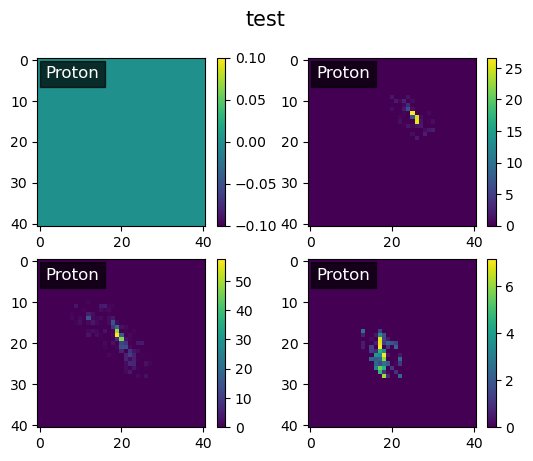

Min. and Max. Value for Image 1:  0.0  -  0.0 . Sum:  0.0
Min. and Max. Value for Image 2:  0.0  -  26.603495 . Sum:  128.19522
Min. and Max. Value for Image 3:  0.0  -  57.33203 . Sum:  471.92776
Min. and Max. Value for Image 4:  0.0  -  7.132531 . Sum:  128.8164


In [1]:
import tables
import tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import fnmatch
import os
#import h5
import glob
import pickle
import sys
import argparse
import h5py
import os.path
import inspect
import json

from datetime import datetime
import time

from ctapipe.io import EventSource
from ctapipe import utils
from ctapipe.instrument.camera import CameraGeometry

from dl1_data_handler.reader import DL1DataReader
from dl1_data_handler.image_mapper import ImageMapper

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras import layers, models, callbacks, optimizers, regularizers
from tensorflow.keras.layers import Input, Concatenate, concatenate, Dense,Lambda,Reshape,Embedding, Conv2D, Conv3D, MaxPooling2D, MaxPooling3D, Flatten, Dropout, ConvLSTM2D, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.models import Model, Sequential
from keras import backend as K
from keras.regularizers import l2

class DataManager():
    """ Data class used to manage the HDF5 data files (simulations + Auger data).
        data_path: data_path of HDF5 file, (hint: use blosc compression to ensure adequate decompression speed,
        to mitigate training bottleneck due to a slow data pipeline)
        params:
            data_path = path to HDF5 datset
        optional params:
            stats: data statistics (stats.json - needed for scaling the dataset)
            tasks: list of tasks to be included (default: ['axis', 'core', 'energy', 'xmax'])
            generator_fn: generator function used for looping over data, generator function needs to have indices and
                          shuffle args.
            ad_map_fn: "advanced mapping function" the function used to map the final dataset. Here an additional
                       preprocessing can be implemented which is mapped during training on the
                       cpu (based on tf.data.experimental.map_and_batch)
    """

    def __init__(self, data_path, stats=None, tasks=['axis', 'impact', 'energy', 'classification']):
        ''' init of DataManager class, to manage simulated (CORSIKA/Offline) and measured dataset '''
        current_timestamp = int(time.time())
        np.random.seed(current_timestamp)
        self.data_path = data_path

    def open_ipython(self):
        from IPython import embed
        embed()

    @property
    def is_data(self):
        return self.type == "Data"

    @property
    def is_mc(self):
        return self.type == "MC"

    def get_h5_file(self):
        return h5py.File(self.data_path, "r")

    def walk_tree(self, details=True):
        """ Draw the tree of yout HDF5 file to see the hierachy of your dataset
            params: detail(activate details to see shapes and used compression ops, Default: True)
        """

        def walk(file, iter_str=''):
            try:
                keys = file.keys()
            except AttributeError:
                keys = []

            for key in keys:
                try:
                    if details:
                        file[key].dtype
                        print(iter_str + str(file[key]))
                    else:
                        print(iter_str + key)
                except AttributeError:
                    print(iter_str + key)
                    walk(file[key], "   " + iter_str)

        with h5py.File(self.data_path, "r") as file:
            print("filename:", file.filename)
            for key in file.keys():
                print(' - ' + key)
                walk(file[key], iter_str='   - ')

    def extract_info(self, path):
        with self.get_h5_file() as f:
            data = f[path]
            y = np.stack(data[:].tolist())

        return {k: y[:, i] for i, k in enumerate(data.dtype.names)}, dict(data.dtype.descr)

    def make_mc_data(self):
        return self.extract_info("simulation/event/subarray/shower")




def re_index_ct14(image):
    return image[5:, :, :]

def make_hess_geometry(file=None):
    # quick fix for dl1 data handler to circumvent to use ctapipe
    if file is None:
        with open(os.path.join(os.getcwd(), "geometry2d3.json")) as f: 
            attr_dict = json.load(f)

        data_ct14 = attr_dict["ct14_geo"]
        data_ct5 = attr_dict["ct5_geo"]
    else:
        data_ct14 = file["configuration/instrument/telescope/camera/geometry_0"][:].tolist()
        data_ct5 = file["configuration/instrument/telescope/camera/geometry_1"][:].tolist()

    class Geometry():
        def __init__(self, data):
            self.pix_id, self.pix_x, self.pix_y, self.pix_area = np.stack(data).T.astype(np.float32)
            self.pos_x = self.pix_x
            self.pos_y = self.pix_y

        def get_pix_pos(self):
            return np.column_stack([self.pix_x, self.pix_y]).T

    return Geometry(data_ct14), Geometry(data_ct5)

def get_current_path():
    filename = inspect.getframeinfo(inspect.currentframe()).filename
    return os.path.dirname(os.path.abspath(filename))

def rotate(pix_pos, rotation_angle=0):
    rotation_angle = rotation_angle * np.pi / 180.0
    rotation_matrix = np.matrix([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                                [np.sin(rotation_angle), np.cos(rotation_angle)], ], dtype=float)

    pixel_positions = np.squeeze(np.asarray(np.dot(rotation_matrix, pix_pos)))
    return pixel_positions

def preprocess_data(train_data, train_labels, threshold=0.00001):
    # Get the dimensions of the input data
    num_events, num_views, height, width, channels = train_data.shape
    
    # Reshape train_data into a single array with shape (num_events * num_views, height, width, channels)
    reshaped_data = train_data.reshape(-1, height, width, channels)
    reshaped_labels = np.repeat(train_labels,4,axis=0)


    # Compute the sum of pixel values along the last axis (assuming your images are grayscale)
    pixel_sums = np.sum(reshaped_data, axis=(1, 2, 3))
    
    # Find indices of images with sums greater than or equal to the threshold
    valid_indices = np.where(pixel_sums >= threshold)
    
    # Filter the reshaped data based on valid_indices
    filtered_data = reshaped_data[valid_indices]
    
    # Reshape train_labels to match the reshaped data
    filtered_labels = reshaped_labels[valid_indices]

    combined_data_labels = list(zip(filtered_data, filtered_labels))

    # Shuffle the combined array
    np.random.shuffle(combined_data_labels)

    # Split the shuffled array back into filtered_data and filtered_labels
    shuffled_data, shuffled_labels = zip(*combined_data_labels)

    # Convert them back to NumPy arrays
    shuffled_data = np.array(shuffled_data)
    shuffled_labels = np.array(shuffled_labels)



    return shuffled_data, shuffled_labels



def plot_image_2by2(train_data,event_nr,labels,string,dt):

    

    

    print("Plotting Example Event. Event Nr: ", event_nr)

    image1 = train_data[:,0,:,:] 
    image2 = train_data[:,1,:,:] 
    image3 = train_data[:,2,:,:] 
    image4 = train_data[:,3,:,:] 

    pltimage1 = image1[event_nr]
    pltimage2 = image2[event_nr]
    pltimage3 = image3[event_nr]
    pltimage4 = image4[event_nr]

    fig, ax = plt.subplots(2,2)

    im1 = ax[0,0].imshow(pltimage1[:,:,0], cmap='viridis',vmin=0)
    im2 = ax[0,1].imshow(pltimage2[:,:,0], cmap='viridis',vmin=0)
    im3 = ax[1,0].imshow(pltimage3[:,:,0], cmap='viridis',vmin=0)
    im4 = ax[1,1].imshow(pltimage4[:,:,0], cmap='viridis',vmin=0)

    cbar1 = fig.colorbar(im1, ax=ax[0, 0], orientation='vertical')
    cbar2 = fig.colorbar(im2, ax=ax[0, 1], orientation='vertical')
    cbar3 = fig.colorbar(im3, ax=ax[1, 0], orientation='vertical')
    cbar4 = fig.colorbar(im4, ax=ax[1, 1], orientation='vertical')


    label1 = labels[event_nr].ravel()[0]
    label2 = labels[event_nr].ravel()[1]
    label3 = labels[event_nr].ravel()[2]
    label4 = labels[event_nr].ravel()[3]

    if label1 == 1: str_label1 = "Gamma" 
    elif label1 == 0: str_label1 = "Proton" 
    else: str_label1 = "Unknown"
    if label2 == 1: str_label2 = "Gamma" 
    elif label2 == 0: str_label2 = "Proton" 
    else: str_label2 = "Unknown"
    if label3 == 1: str_label3 = "Gamma" 
    elif label3 == 0: str_label3 = "Proton" 
    else: str_label3 = "Unknown"
    if label4 == 1: str_label4 = "Gamma" 
    elif label4 == 0: str_label4 = "Proton" 
    else: str_label4 = "Unknown"

    ax[0, 0].text(0.05, 0.95, str_label1, transform=ax[0, 0].transAxes, color='white', fontsize=12, ha='left', va='top', bbox=dict(facecolor='black', alpha=0.7))
    ax[0, 1].text(0.05, 0.95, str_label2, transform=ax[0, 1].transAxes, color='white', fontsize=12, ha='left', va='top', bbox=dict(facecolor='black', alpha=0.7))
    ax[1, 0].text(0.05, 0.95, str_label3, transform=ax[1, 0].transAxes, color='white', fontsize=12, ha='left', va='top', bbox=dict(facecolor='black', alpha=0.7))
    ax[1, 1].text(0.05, 0.95, str_label4, transform=ax[1, 1].transAxes, color='white', fontsize=12, ha='left', va='top', bbox=dict(facecolor='black', alpha=0.7))
    fig.suptitle(string,fontsize = 15)
    
    
    plt.show()
    time.sleep(3)
    plt.close()

    print("Min. and Max. Value for Image 1: ", np.min(pltimage1), " - " , np.max(pltimage1) , ". Sum: ", np.sum(pltimage1))
    print("Min. and Max. Value for Image 2: ", np.min(pltimage2), " - " , np.max(pltimage2), ". Sum: ", np.sum(pltimage2))
    print("Min. and Max. Value for Image 3: ", np.min(pltimage3), " - " , np.max(pltimage3), ". Sum: ", np.sum(pltimage3))
    print("Min. and Max. Value for Image 4: ", np.min(pltimage4), " - " , np.max(pltimage4), ". Sum: ", np.sum(pltimage4))

    str_evnr = '{}'.format(event_nr)
    name = "Test_images/Test_figure_evnr_" + str_evnr + "_" + string + "_" + dt + ".png"
    #fig.savefig(name)#

def plot_single_image_2by2(train_data,event_nr,labels,string,dt):
    
    print("Plotting Example Single Images. Event Nr: ", event_nr , " to " , (event_nr+3))

    image1 = train_data


    pltimage1 = image1[event_nr]
    pltimage2 = image1[event_nr+1]
    pltimage3 = image1[event_nr+2]
    pltimage4 = image1[event_nr+3]

    fig, ax = plt.subplots(2,2)

    im1 = ax[0,0].imshow(pltimage1[:,:,0], cmap='viridis',vmin=0)
    im2 = ax[0,1].imshow(pltimage2[:,:,0], cmap='viridis',vmin=0)
    im3 = ax[1,0].imshow(pltimage3[:,:,0], cmap='viridis',vmin=0)
    im4 = ax[1,1].imshow(pltimage4[:,:,0], cmap='viridis',vmin=0)

    cbar1 = fig.colorbar(im1, ax=ax[0, 0], orientation='vertical')
    cbar2 = fig.colorbar(im2, ax=ax[0, 1], orientation='vertical')
    cbar3 = fig.colorbar(im3, ax=ax[1, 0], orientation='vertical')
    cbar4 = fig.colorbar(im4, ax=ax[1, 1], orientation='vertical')


    label1 = labels[event_nr].ravel()
    label2 = labels[event_nr+2].ravel()
    label3 = labels[event_nr+3].ravel()
    label4 = labels[event_nr+4].ravel()

    if label1 == 1: str_label1 = "Gamma" 
    elif label1 == 0: str_label1 = "Proton" 
    else: str_label1 = "Unknown"
    if label2 == 1: str_label2 = "Gamma" 
    elif label2 == 0: str_label2 = "Proton" 
    else: str_label2 = "Unknown"
    if label3 == 1: str_label3 = "Gamma" 
    elif label3 == 0: str_label3 = "Proton" 
    else: str_label3 = "Unknown"
    if label4 == 1: str_label4 = "Gamma" 
    elif label4 == 0: str_label4 = "Proton" 
    else: str_label4 = "Unknown"


    ax[0, 0].text(0.05, 0.95, str_label1, transform=ax[0, 0].transAxes, color='white', fontsize=12, ha='center', va='center', bbox=dict(facecolor='black', alpha=0.7))
    ax[0, 1].text(0.05, 0.95, str_label2, transform=ax[0, 1].transAxes, color='white', fontsize=12, ha='center', va='center', bbox=dict(facecolor='black', alpha=0.7))
    ax[1, 0].text(0.05, 0.95, str_label3, transform=ax[1, 0].transAxes, color='white', fontsize=12, ha='center', va='center', bbox=dict(facecolor='black', alpha=0.7))
    ax[1, 1].text(0.05, 0.95, str_label4, transform=ax[1, 1].transAxes, color='white', fontsize=12, ha='center', va='center', bbox=dict(facecolor='black', alpha=0.7))
    plt.show()
    time.sleep(3)
    plt.close()

    plt.title(string)

    print("Min. and Max. Value for Image 1: ", np.min(pltimage1), " - " , np.max(pltimage1) , ". Sum: ", np.sum(pltimage1))
    print("Min. and Max. Value for Image 2: ", np.min(pltimage2), " - " , np.max(pltimage2), ". Sum: ", np.sum(pltimage2))
    print("Min. and Max. Value for Image 3: ", np.min(pltimage3), " - " , np.max(pltimage3), ". Sum: ", np.sum(pltimage3))
    print("Min. and Max. Value for Image 4: ", np.min(pltimage4), " - " , np.max(pltimage4), ". Sum: ", np.sum(pltimage4))

    str_evnr = '{}'.format(event_nr)
    name = "Test_images/Test_figure_evnr_" + str_evnr + "_" + string + "_" + dt + ".png"
    #fig.savefig(name)

def handle_nan(data,labels):
    # Check for NaN values
    nan_mask = np.isnan(data)
        # Check if any image in an event has NaN values
    nan_event_mask = np.any(np.any(np.any(nan_mask, axis=-1), axis=-1), axis=-1)

    # Get indices of events to be removed
    events_to_remove = np.where(nan_event_mask)[0]

    # Remove events from data and labels
    data = np.delete(data, events_to_remove, axis=0)
    labels = np.delete(labels, events_to_remove, axis=0)
    
    # Calculate total count and percentage of NaN entries
    total_nan_entries = np.sum(nan_mask)
    total_entries = np.size(data)
    nan_percentage = (total_nan_entries / total_entries) * 100.0
    
    print(f"Total NaN entries: {total_nan_entries}")
    print(f"Percentage of NaN entries: {nan_percentage:.6f}%")
    
    # Set NaN entries to zero
    #data[nan_mask] = 0.0
    
    return data , labels

def handle_inf(data):
    # Check for NaN values
    nan_mask = np.isinf(data)
    
    # Calculate total count and percentage of NaN entries
    total_nan_entries = np.sum(nan_mask)
    total_entries = np.size(data)
    nan_percentage = (total_nan_entries / total_entries) * 100.0
    
    print(f"Total inf entries: {total_nan_entries}")
    print(f"Percentage of inf entries: {nan_percentage:.6f}%")
    
    # Set NaN entries to zero
    #data[nan_mask] = 0.0
    
    return data

def print_event_composition(labels, event_types=('proton', 'gamma')):
    """
    Print the composition of events in the given array.

    Parameters:
    - labels: numpy array of shape (num_events, 1) containing 1s or 0s.
    - event_types: Tuple of strings representing the event types.

    Example:
    >>> labels = np.array([[1], [0], [1], [1], [0], [0]])
    >>> print_event_composition(labels, event_types=('proton', 'gamma'))
    """

    if labels.shape[1] != 1:
        raise ValueError("The input array should have shape (num_events, 1)")

    event_counts = {event_types[0]: np.sum(labels == 0), event_types[1]: np.sum(labels == 1)}

    print("Event Composition:")
    for event_type, count in event_counts.items():
        print(f"{count} '{event_type}' events")

# Example usage:
# Assuming you have numpy imported and your arrays are named test_labels and train_labels
# Make sure to adjust the event_types based on your specific labels.
# event_types = ('proton', 'gamma') by default.


print("Functions Defined.")

parser = argparse.ArgumentParser()
parser.add_argument("-e", "--epochs", type=int, default=50)
parser.add_argument("-b", "--batch_size", type=int,default=32)
parser.add_argument("-r", "--rate", type=float,default=0.0001)
parser.add_argument("-reg", "--regulization", type=float,default=0.00001)
parser.add_argument("-t", "--threshold", type=float,default=60)
parser.add_argument("-c", "--cut", type=int,default=2)
parser.add_argument("-ne", "--numevents", type=int,default=100000)
parser.add_argument("-ft","--fusiontype",type=str,default="latefc")
parser.add_argument("-n","--normalize",type=str,default="nonorm")
parser.add_argument("-loc","--location",type=str,default="alex")
parser.add_argument("-transfer","--transfer",type=str,default="no")
parser.add_argument("-base","--base",type=str,default='moda')
parser.add_argument("-lr",'--learningrate',type=float,default=0.001)
parser.add_argument("-plt",'--plot',type=str,default='no')

args = parser.parse_args()
num_epochs = args.epochs
batch_size = args.batch_size
rate = args.rate
reg = args.regulization
sum_threshold = args.threshold
cut_nonzero = args.cut
num_events = args.numevents
fusiontype = args.fusiontype
normalize = args.normalize
location = args.location
transfer = args.transfer
base = args.base
learning_rate = args.learningrate
plot = args.plot

print("############################################################################")
print("\n #####################    FUSIONTYPE: ",fusiontype,"   #######################")
print("\n")
print("\n Epochs: ", num_epochs)
print("\n Batch Size: ", batch_size)
print("\n Regularization: ", reg)
print("\n Events: ", num_events)
print("\n Learning Rate: ", learning_rate)
print("\n Transfer: ", transfer)
print("\n Threshold: ", sum_threshold)
print("\n Nonzero Cut: ", cut_nonzero)
print("\n Plotting Events: ", plot)
print("\n")
# Define the appendix to the file, for being able to specify some general changes in the model structure and trace back the changes when comparing the results of t´different models
fnr = "CustomResNet" 

current_datetime = datetime.now()
formatted_datetime = current_datetime.strftime("%Y-%m-%d_%H-%M")
print("Date-Time: ", formatted_datetime)

num_events = 2000
location = 'local'
amount = int(num_events * 2)

if location == 'local':
    filePath_gamma="../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ECAP_HiWi_WorkingDirectory/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5"
    filePath_proton="../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ECAP_HiWi_WorkingDirectory/phase2d3_timeinfo_proton_hybrid_preselect_20deg_0deg.h5"
elif location == 'alex':    
    filePath_gamma = "../../../../wecapstor1/caph/mppi111h/new_sims/dnn/gamma_diffuse_noZBDT_noLocDist_hybrid_v2.h5"
    filePath_proton="../../../../wecapstor1/caph/mppi111h/new_sims/dnn/proton_noZBDT_noLocDist_hybrid_v2.h5"
else: print("Wrong location specified!")

dm_gamma = DataManager(filePath_gamma)
f_g = dm_gamma.get_h5_file()

if num_events >= len(f_g["dl1/event/telescope/images/tel_001"][:]) : num_events = len(f_g["dl1/event/telescope/images/tel_001"][:]) - 2
if amount >= len(f_g["dl1/event/telescope/images/tel_001"][:]) : amount = len(f_g["dl1/event/telescope/images/tel_001"][:]) - 1

tel1g_raw = f_g["dl1/event/telescope/images/tel_001"][0:amount]
tel2g_raw = f_g["dl1/event/telescope/images/tel_002"][0:amount]
tel3g_raw = f_g["dl1/event/telescope/images/tel_003"][0:amount]
tel4g_raw = f_g["dl1/event/telescope/images/tel_004"][0:amount]
#tel5g_raw = f_g["dl1/event/telescope/images/tel_005"][0:amount]

print("Successfully opened gamma data!")

labelsg = np.stack([data[2] for data in tel1g_raw])
labelsg_ones = np.ones_like(labelsg)

f_g.close()

dm_proton = DataManager(filePath_proton)
f_p = dm_proton.get_h5_file()

tel1p_raw = f_p["dl1/event/telescope/images/tel_001"][0:amount]
tel2p_raw = f_p["dl1/event/telescope/images/tel_002"][0:amount]
tel3p_raw = f_p["dl1/event/telescope/images/tel_003"][0:amount]
tel4p_raw = f_p["dl1/event/telescope/images/tel_004"][0:amount]
#tel5p_raw = f_p["dl1/event/telescope/images/tel_005"][0:amount]

print("Successfully opened proton data!")

labelsp = np.stack([data[2] for data in tel1p_raw])
labelsp_zeros = np.zeros_like(labelsp)

tel1 = np.concatenate((tel1g_raw,tel1p_raw),axis=0)
tel2 = np.concatenate((tel2g_raw,tel2p_raw),axis=0)
tel3 = np.concatenate((tel3g_raw,tel3p_raw),axis=0)
tel4 = np.concatenate((tel4g_raw,tel4p_raw),axis=0)
#tel5 = np.concatenate((tel5g_raw,tel5p_raw),axis=0)
labels = np.concatenate((labelsg_ones,labelsp_zeros),axis=0)


if np.all(np.logical_or(labels == 0, labels == 1)):
    print("The label array only consists of zeros and ones.")
else:
    print("Attention: The label array contains values other than zeros and ones!!!")

del tel1g_raw
del tel2g_raw
del tel3g_raw
del tel4g_raw

del tel1p_raw
del tel2p_raw
del tel3p_raw
del tel4p_raw

f_p.close()

del labelsp
del labelsg
del labelsp_zeros
del labelsg_ones

print("Shape of Tel1: ",np.shape(tel1))
print("Shape of Tel2: ",np.shape(tel2))
print("Shape of Tel3: ",np.shape(tel3))
print("Shape of Tel4: ",np.shape(tel4))
#print("Shape of Tel5: ",np.shape(tel5))
print("Shape of Labels: ",np.shape(labels))
print("Labels: ",labels)

geo_ct14, geo_ct5 = make_hess_geometry()
print(os.getcwd())
ct_14_mapper = ImageMapper(camera_types=["HESS-I"], pixel_positions={"HESS-I": rotate(geo_ct14.get_pix_pos())}, mapping_method={"HESS-I": "axial_addressing"})
#ct_5_mapper = ImageMapper(camera_types=["HESS-II"], pixel_positions={"HESS-II": rotate(geo_ct5.get_pix_pos())}, mapping_method={"HESS-II": "axial_addressing"})

'''
mapped_images_1 = np.empty((num_events, 41,41,1))
mapped_images_2 = np.empty((num_events, 41,41,1))
mapped_images_3 = np.empty((num_events, 41,41,1))
mapped_images_4 = np.empty((num_events, 41,41,1))
#mapped_images_4 = np.empty((num_events, 41,41,1))
mapped_labels = np.empty(num_events,dtype=int)
'''

mapped_images_1, mapped_images_2, mapped_images_3, mapped_images_4 = [], [], [], []
mapped_labels = []
valid_events_count = 0

length = num_events
max_value = len(tel1)
random_list = np.random.randint(max_value, size=2*length)

image_nr = 0

print(random_list[0:10])

#cut_nonzero = 3
threshold_value = 1e-8  # Adjust this threshold value as needed

print("Start Mapping...")

for event_nr in random_list:

    if image_nr >= (num_events -1):
        break
    if event_nr < len(labels):
        image_1 = ct_14_mapper.map_image(tel1[event_nr][3][:, np.newaxis], 'HESS-I')
        image_2 = ct_14_mapper.map_image(tel2[event_nr][3][:, np.newaxis], 'HESS-I')
        image_3 = ct_14_mapper.map_image(tel3[event_nr][3][:, np.newaxis], 'HESS-I')   
        image_4 = ct_14_mapper.map_image(tel4[event_nr][3][:, np.newaxis], 'HESS-I')
        #image_5 = ct_5_mapper.map_image(tel5[event_nr][3][:, np.newaxis], 'HESS-II')   

        image_1[image_1 < threshold_value] = 0
        image_2[image_2 < threshold_value] = 0
        image_3[image_3 < threshold_value] = 0
        image_4[image_4 < threshold_value] = 0

        image_1[image_1.sum() < sum_threshold] = 0
        image_2[image_2.sum() < sum_threshold] = 0
        image_3[image_3.sum() < sum_threshold] = 0
        image_4[image_4.sum() < sum_threshold] = 0

            # Set all pixels lower than the threshold value to zero


        non_zero_count = sum(1 for img in [image_1, image_2, image_3, image_4] if np.sum(img) > 0)
        if non_zero_count >= cut_nonzero:
            #mapped_images_1[image_nr] = image_1
            #mapped_images_2[image_nr] = image_2
            #mapped_images_3[image_nr] = image_3
            #mapped_images_4[image_nr] = image_4
            #mapped_images_5[image_nr] = image_5
            #mapped_labels[image_nr] = labels[event_nr]
            #image_nr += 1
            mapped_images_1.append(image_1)
            mapped_images_2.append(image_2)
            mapped_images_3.append(image_3)
            mapped_images_4.append(image_4)
            # Assuming labels array is defined and contains 0 or 1 for each event_nr
            mapped_labels.append(labels[event_nr])
            
            # Increment the valid events counter
            valid_events_count += 1


        if valid_events_count == num_events:
            break
    else:
        print(f"Warning: event_nr {event_nr} exceeds the valid range for labels.")

# Convert the lists to arrays
mapped_images_1 = np.array(mapped_images_1)
mapped_images_2 = np.array(mapped_images_2)
mapped_images_3 = np.array(mapped_images_3)
mapped_images_4 = np.array(mapped_images_4)
mapped_labels = np.array(mapped_labels)
print("... Finished Mapping")
print("Mapped Label Selection: ",mapped_labels[-20:-10])



nan_mask_mapped_labels = np.isnan(mapped_labels)
if np.any(nan_mask_mapped_labels):
    print("Warning: NaN values found in mapped_labels. Handle accordingly.")

mapped_images = np.array([mapped_images_1,mapped_images_2,mapped_images_3,mapped_images_4]) #mapped_images_5])
print("Shape of mapped_images_1: ",np.shape(mapped_images_1))
print("Shape of mapped_images: ",np.shape(mapped_images))



if np.all(np.logical_or(mapped_labels == 0, mapped_labels == 1)):
    print("The mapped_labels array only consists of zeros and ones.")
else:
    print("Attention: The mapped_labels array contains values other than zeros and ones!!!")

del tel1
del tel2
del tel3
del tel4
del labels

del mapped_images_1
del mapped_images_2
del mapped_images_3
del mapped_images_4

# Reshape the final array, so it is present in the same way as MoDAII data
mapped_images = np.transpose(mapped_images, (1, 0, 2, 3, 4))
#mapped_images = np.squeeze(mapped_images, axis=-1)
mapped_labels = mapped_labels[:,np.newaxis]

print("New shape of mapped_images: ",np.shape(mapped_images))
print("New shape of mapped_labels: ",np.shape(mapped_labels))

mapped_labels_multishape = np.zeros_like(mapped_images)


len_mapped = np.shape(mapped_images)[0]
print("Sanity Check: len_mapped: ",len_mapped)
for i in range(0,len_mapped):
    mapped_labels_multishape[i,:,:,:] = mapped_labels[i]


randnum = np.random.randint(0,np.shape(mapped_images)[0])
print("Mapped Images Event ",randnum,": Image plotted!")
plot_image_2by2(mapped_images,randnum,mapped_labels_multishape,string="mapped",dt=formatted_datetime)
randnum = np.random.randint(0,np.shape(mapped_images)[0])
print("Mapped Images Event ",randnum,": Image plotted!")
plot_image_2by2(mapped_images,randnum,mapped_labels_multishape,string="mapped",dt=formatted_datetime)

########################################################
# START WITH CNN STUFF


patience = 8
input_shape = (41, 41, 1)
#input_shape5 = (72,72,1)
pool_size = 2
kernel_size = 2
dropout_rate = 0.2

# some reshaping for the further use of the timing data in the CNN
#mapped_images = mapped_images.reshape((*np.shape(mapped_images),1))

# overview about the important data array for later usage
print(np.shape(mapped_images)[0], " events with 4 images each are available \n")
print("Shape of 'mapped_labels': ",np.shape(mapped_labels))
print("Shape of 'mapped_images': ",np.shape(mapped_images),"\n")

# split into random training data (80%) and test data (20%)
train_data = []
test_data = []
train_labels = []
test_labels = [] 

#data_dummy = mapped_images

random_selection = np.random.rand(np.shape(mapped_images)[0]) <= 0.8

#print("Mapped Labels:", mapped_labels)

train_data.append(mapped_images[random_selection])
test_data.append(mapped_images[~random_selection])
train_labels.append(mapped_labels[random_selection])
test_labels.append(mapped_labels[~random_selection])

#mapped_images = data_dummy
#del data_dummy

print(random_selection[0:10])

# free some memory space
del mapped_images
del mapped_labels

# convert to numpy array and reshape 
train_data = np.array(train_data)
train_data = train_data.reshape(np.shape(train_data[0]))
test_data = np.array(test_data)
test_data = test_data.reshape(np.shape(test_data[0]))

train_labels = np.array(train_labels)
train_labels = train_labels.reshape(np.shape(train_labels[0]))
test_labels = np.array(test_labels)
test_labels = test_labels.reshape(np.shape(test_labels[0]))

len_train = np.shape(train_data)[0]
len_test = np.shape(test_data)[0]


train_labels_multishape = np.zeros_like(train_data)
test_labels_multishape = np.zeros_like(test_data)



for i in range(0,len_train):
    train_labels_multishape[i,:,:,:] = train_labels[i]

for k in range(0,len_test):
    test_labels_multishape[k,:,:,:] = test_labels[k]

# overvew about the splitting into training and test data
print("Split into Training and Test Data")
print("Train data shape:", np.shape(train_data) , "-->",round(100*len_train/(len_train+len_test),2),"%")
print("Test data shape:", np.shape(test_data), "-->",round(100*len_test/(len_train+len_test),2), "%")
print("Train labels shape:", np.shape(train_labels))
print("Test labels shape:", np.shape(test_labels))

train_data,train_labels = handle_nan(train_data,train_labels)
test_data,test_labels = handle_nan(test_data,test_labels)

print("Train data shape:", np.shape(train_data) , "-->",round(100*len_train/(len_train+len_test),2),"%")
print("Test data shape:", np.shape(test_data), "-->",round(100*len_test/(len_train+len_test),2), "%")
print("Train labels shape:", np.shape(train_labels))
print("Test labels shape:", np.shape(test_labels))

#train_data = handle_inf(train_data)
#test_data = handle_inf(test_data)

max_values_train = np.max(train_data, axis=(1, 2, 3, 4))
max_values_test = np.max(test_data, axis=(1, 2, 3, 4))

max_mask_train = max_values_train < 1.0
max_mask_test = max_values_test < 1.0

max_values_train[max_mask_train] = 1.0
max_values_test[max_mask_test] = 1.0



if normalize == "norm": 
    train_data = train_data/ max_values_train[:, np.newaxis, np.newaxis, np.newaxis, np.newaxis]
    test_data = test_data/ max_values_test[:, np.newaxis, np.newaxis, np.newaxis, np.newaxis]
    print("Data Normalized for each Event!")


filtered_data,filtered_labels = preprocess_data(train_data,train_labels)
filtered_test_data,filtered_test_labels = preprocess_data(test_data,test_labels)

print(np.shape(filtered_data))
print(np.shape(filtered_labels))

print("Test Set:")
print_event_composition(test_labels)

print("\nTrain Set:")
print_event_composition(train_labels)


randnum = np.random.randint(0,np.shape(train_data)[0])
print("Train Data Event ",randnum,": Image plotted!")
plot_image_2by2(train_data,randnum,train_labels_multishape,string="train",dt=formatted_datetime)
randnum = np.random.randint(0,np.shape(train_data)[0])
print("Train Data Event ",randnum,": Image plotted!")
plot_image_2by2(train_data,randnum,train_labels_multishape,string="train",dt=formatted_datetime)

randnum = np.random.randint(0,np.shape(test_data)[0])
print("Test Data Event ",randnum,": Image plotted!")
plot_image_2by2(test_data,randnum,test_labels_multishape,string="test",dt=formatted_datetime)
randnum = np.random.randint(0,np.shape(test_data)[0])
print("Test Data Event ",randnum,": Image plotted!")
plot_image_2by2(test_data,randnum,test_labels_multishape,string="test",dt=formatted_datetime)

In [12]:
import tensorflow as tf
from keras.layers import Input, Conv2D, BatchNormalization, Flatten, Activation, Add, GlobalAveragePooling2D, Dense, AveragePooling2D, Dropout, Lambda, concatenate
from keras.models import Model
from keras import backend as K
input_shape = (41, 41, 1)
filters_1 , filters_2, filters_3 = 512, 1024, 2048
dropout_rate = 0.2
#dropout_rate = dropout_rate
#reg = 0.00001

def create_base_model(inputs,freeze=False):
    
    Conv1 = Conv2D(filters=25, kernel_size=kernel_size, padding='same',kernel_regularizer=regularizers.l2(reg), input_shape=input_shape,)(inputs)
    LeakyRelu1 = LeakyReLU(alpha=0.1)(Conv1)
    MaxPool1 = MaxPooling2D(pool_size=pool_size, padding='same')(LeakyRelu1)

    #print("Before first Dropout")

    Dropout1 = Dropout(dropout_rate)(MaxPool1)
    Conv2 = Conv2D(filters=30, kernel_size=kernel_size,padding='same', kernel_regularizer=regularizers.l2(reg))(Dropout1)
    LeakyRelu2 = LeakyReLU(alpha=0.1)(Conv2) 
    MaxPool2 = MaxPooling2D(pool_size=pool_size, padding='same')(LeakyRelu2)

    Dropout2 = Dropout(dropout_rate)(MaxPool2)
    Conv3 = Conv2D(filters=50, kernel_size=kernel_size,padding='same', kernel_regularizer=regularizers.l2(reg))(Dropout2)
    LeakyRelu3 = LeakyReLU(alpha=0.1)(Conv3) 
    MaxPool3 = MaxPooling2D(pool_size=pool_size, padding='same')(LeakyRelu3)

    Dropout3 = Dropout(dropout_rate)(MaxPool3)
    Conv4 = Conv2D(filters=50, kernel_size=kernel_size,padding='same', kernel_regularizer=regularizers.l2(reg))(Dropout3)
    LeakyRelu4 = LeakyReLU(alpha=0.1)(Conv4) 
    MaxPool4 = MaxPooling2D(pool_size=pool_size, padding='same')(LeakyRelu4)

    Dropout4 = Dropout(dropout_rate)(MaxPool4)
    Conv5 = Conv2D(filters=100, kernel_size=kernel_size,padding='same', kernel_regularizer=regularizers.l2(reg))(Dropout4)
    LeakyRelu5 = LeakyReLU(alpha=0.1)(Conv5) 
    MaxPool5 = MaxPooling2D(pool_size=pool_size, padding='same')(LeakyRelu5)

    Dropout5 = Dropout(dropout_rate)(MaxPool5)
    Conv6 = Conv2D(filters=100, kernel_size=kernel_size,padding='same', kernel_regularizer=regularizers.l2(reg))(Dropout5)
    MaxPool6 = MaxPooling2D(pool_size=pool_size, padding='same')(Conv6)

    Dropout6 = Dropout(dropout_rate)(MaxPool6)
    Conv7 = Conv2D(filters=200, kernel_size=kernel_size,padding='same', kernel_regularizer=regularizers.l2(reg))(Dropout6)
    MaxPool7 = MaxPooling2D(pool_size=pool_size, padding='same')(Conv7)

    Flat = Flatten()(MaxPool7)
    Dense1 = Dense(units=1024, activation='relu')(Flat)

    model = Model(inputs=inputs, outputs=Dense1)

    # Vieeel zu Komplex, Model dümpelt bei 50% rum, so wie das CustomResNet
    # Wsl ist auch das zu komplex -> vereinfachtere Versionen mit und ohne residual connecitons abchecken und vergleichen

    if freeze:
        for layer in model.layers:
            layer.trainable = False

    return model

def create_base_model_customresnet2(inputs,model_name,freeze=False):

    # Assuming filters_1, filters_2, filters_3 are defined
    filters_1, filters_2, filters_3 = 24, 52, 100

    # Block definitions
    blocks = [
    {"name": "B0_1", "strides": (2, 2),"filters": filters_2},
    {"name": "B0_2", "strides": (1, 1), "filters": filters_2},
    {"name": "B0_3", "strides": (1, 1), "filters": filters_2},
    #{"name": "B1_1", "strides": (2, 2),"filters": filters_1},
    #{"name": "B1_2", "strides": (1, 1), "filters": filters_1},
    #{"name": "B1_3", "strides": (1, 1), "filters": filters_1},
    #{"name": "B2_1", "strides": (2, 2),"filters": filters_2},
    #{"name": "B2_2", "strides": (1, 1), "filters": filters_2},
    #{"name": "B2_3", "strides": (1, 1), "filters": filters_2},
    #{"name": "B3_1", "strides": (2, 2),"filters": filters_3},
    #{"name": "B3_2", "strides": (1, 1), "filters": filters_3},
    #{"name": "B3_3", "strides": (1, 1), "filters": filters_3},
    ]

    inputconv_name = model_name + "_InputConvolution"
    inputconv = Conv2D(64, (3, 3),strides = (2,2), padding='same',name=inputconv_name)(inputs)

    shortcut = inputconv

    for block_info in blocks:
        block_name = block_info["name"]
        block_filters = block_info["filters"]

        # Conv1x1-A
        xa_name = f"{model_name}{block_name}_Conv1x1-A"
        xa = Conv2D(block_filters // 4, (1, 1), strides=block_info["strides"], padding='same', name=xa_name)(shortcut)
        xb = BatchNormalization()(xa)
        xc_name = f"{model_name}{block_name}_ReLU-A"
        xc = Activation('relu', name=xc_name)(xb)

        dropout1 = Dropout(dropout_rate)(xc)

        # Conv3x3-B
        xd_name = f"{model_name}{block_name}_Conv3x3-B"
        xd = Conv2D(block_filters // 4, (3, 3), strides=block_info["strides"], padding='same', name=xd_name)(dropout1)
        xe = BatchNormalization()(xd)
        xf_name = f"{model_name}{block_name}_ReLU-B"
        xf = Activation('relu', name=xf_name)(xe)

        dropout2 = Dropout(dropout_rate)(xf)

        # Conv1x1-C
        xg_name = f"{model_name}{block_name}_Conv1x1-C"
        xg = Conv2D(block_filters, (1, 1), strides=block_info["strides"], padding='same', name=xg_name)(dropout2)
        xh = BatchNormalization()(xg)

        # Residual Connection
        if block_info["strides"] == (1, 1):  # Add residual connection only if strides are (1, 1)
            xi = Add()([xh, shortcut])
        else:
            xi = xh
        xj_name = f"{model_name}{block_name}_ReLU-Final"
        xj = Activation('relu', name=xj_name)(xi)

        # Update shortcut for the next iteration
        shortcut = xj

    avgpool = Lambda(lambda x: K.mean(x, axis=(1, 2), keepdims=False))(xj)
    #avgpool = GlobalAveragePooling2D(kernel_size=(2,2),name=avgpoolname)(x)

    dropout = Dropout(dropout_rate)(avgpool)
    flat = Flatten()(dropout)
    dense = Dense(units=filters_3, activation='relu')(flat) # try filters: 1024
    model = Model(inputs=inputs, outputs=dense,name=model_name)

    if freeze:
        for layer in model.layers:
            layer.trainable = False
            
    return model



def create_single_model(model):
    inputs = model.input
    x = model.output
    x = Dropout(0.5)(x)
    #x = Flatten(x)
    outputs = Dense(units=1, activation='sigmoid')(x)
    model_single = Model(inputs,outputs)
    #print_layer_dimensions(model_single)
    return model_single

def create_latefc_model(models,inputs):
    fusionlayer = concatenate([model.output for model in models])
    #fusionlayer = Dense(units=filters_3,activation="relu")(fusionlayer)
    x = Dropout(0.5)(fusionlayer)
    #x = Flatten(x)
    outputs = Dense(units=1, activation='sigmoid')(x)
    model_multi = Model(inputs,outputs)
    #print_layer_dimensions(model_multi)
    return model_multi

def create_latemax_model(models,inputs):
    fusionlayer = Lambda(lambda x: tf.reduce_max(x, axis=0), output_shape=input_shape)([model.output for model in models])
    x = Dropout(0.5)(fusionlayer)
    #x = Flatten(x)
    outputs = Dense(units=1, activation='sigmoid')(x)
    model_multi = Model(inputs,outputs)
    #print_layer_dimensions(model_multi)
    return model_multi

In [10]:
# MoDA Base Model

input_1 = Input(shape=input_shape)
cnn_model_1 = create_base_model(input_1)
input_2 = Input(shape=input_shape)
cnn_model_2 = create_base_model(input_2)
input_3 = Input(shape=input_shape)
cnn_model_3 = create_base_model(input_3)
input_4 = Input(shape=input_shape)
cnn_model_4 = create_base_model(input_4)  



In [14]:
# CustomResNet Base Model

input_1 = Input(shape=input_shape)
cnn_model_1 = create_base_model_customresnet2(input_1,'Model1')
input_2 = Input(shape=input_shape)
cnn_model_2 = create_base_model_customresnet2(input_2,'Model2')
input_3 = Input(shape=input_shape)
cnn_model_3 = create_base_model_customresnet2(input_3,'Model3')
input_4 = Input(shape=input_shape)
cnn_model_4 = create_base_model_customresnet2(input_4,'Model4')     

In [15]:
from keras.losses import BinaryCrossentropy
learning_rate = 0.001
opt = keras.optimizers.Adam(learning_rate=learning_rate) 
loss_fn = BinaryCrossentropy(from_logits=True)
early_stopping_callback_1=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=patience,verbose=1,mode='auto')

model_multi = create_latefc_model([cnn_model_1, cnn_model_2, cnn_model_3, cnn_model_4],[input_1, input_2, input_3, input_4])
from keras.utils.vis_utils import plot_model
#plot_model(model_multi,to_file="model_plot.png",show_shapes=True, show_layer_names=True)

model_multi.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model_multi.fit([train_data[:,i,:,:] for i in range(4)],train_labels,epochs=num_epochs,batch_size=batch_size,validation_data=([test_data[:,i,:,:] for i in range(4)], test_labels), callbacks=[early_stopping_callback_1])


Epoch 1/50
51/51 [==============================] - 47s 835ms/step - loss: 0.7605 - accuracy: 0.5140 - val_loss: 0.7216 - val_accuracy: 0.4912
Epoch 2/50
51/51 [==============================] - 43s 832ms/step - loss: 0.7532 - accuracy: 0.5140 - val_loss: 0.7026 - val_accuracy: 0.5264
Epoch 3/50
51/51 [==============================] - 39s 774ms/step - loss: 0.7256 - accuracy: 0.5334 - val_loss: 0.7104 - val_accuracy: 0.5139
Epoch 4/50
51/51 [==============================] - 41s 810ms/step - loss: 0.7192 - accuracy: 0.5066 - val_loss: 0.7034 - val_accuracy: 0.5264
Epoch 5/50
51/51 [==============================] - 41s 801ms/step - loss: 0.7248 - accuracy: 0.5221 - val_loss: 0.7011 - val_accuracy: 0.5189
Epoch 6/50
51/51 [==============================] - 39s 774ms/step - loss: 0.7120 - accuracy: 0.5271 - val_loss: 0.7225 - val_accuracy: 0.5264
Epoch 7/50
51/51 [==============================] - 38s 741ms/step - loss: 0.7244 - accuracy: 0.5172 - val_loss: 0.7172 - val_accuracy: 0.5189